In [70]:
import pandas as pd
import seaborn as sns
from folium import plugins
import folium

# Analisis exploratorio de datos
Lo primero que se hace son cargar los datos

In [71]:
lista = pd.read_csv('listings.csv')

In [72]:
lista

id           source  \
0                    6369      city scrape   
1                   21853      city scrape   
2                   26825      city scrape   
3                   30320      city scrape   
4                   30959  previous scrape   
...                   ...              ...   
15655  842703662293308836      city scrape   
15656  842808783561698553      city scrape   
15657  843410498254940598      city scrape   
15658  843487874169862949      city scrape   
15659  843544239423340038      city scrape   

                                           name  \
0      Rooftop terrace room ,  ensuite bathroom   
1                          Bright and airy room   
2            Single Room whith private Bathroom   
3                   Great Vacational Apartments   
4               Beautiful loft in Madrid Center   
...                                         ...   
15655             Habitación en piso compartido   
15656               Habitación cómoda y privada   
15657         Precioso apartamento en el centro   
15658             Habitación privada en Madrid.   
15659                Habitación Privada Confort   

                                             description  \
0      Excellent connection with the AIRPORT and EXHI...   
1      We have a quiet and sunny room with a good vie...   
2      Nice and cozy roon for one person with a priva...   
3      <b>The space</b><br />Fully furnished spacious...   
4      Beautiful Loft 60m2 size just in the historica...   
...                                                  ...   
15655  Disfruta de la sencillez de este alojamiento t...   
15656  Disfruta de la sencillez de este alojamiento t...   
15657  Es un apartamento en planta baja  interior, tr...   
15658  Es una habitación privada dentro del piso que ...   
15659  Disfruta de una experiencia de lujo en este cé...   

                                   neighborhood_overview    host_id  \
0                                                    NaN      13660   
1      We live in a leafy neighbourhood with plenty o...      83531   
2      Es un barrio muy tranquilo, en una zona de Mad...     114340   
3                                                    NaN     130907   
4                                                    NaN     132883   
...                                                  ...        ...   
15655  Tranquilo y uno de los mejores de madrid - Bar...  184959620   
15656                                                NaN  341900976   
15657  El barrio, chamberi, es de los mas castizos de...  264037527   
15658                                                NaN  230936437   
15659                        Tranquilo y bien comunicado  455852114   

              host_name     host_location  \
0                 Simon     Madrid, Spain   
1                 Abdel     Madrid, Spain   
2              Agustina     Madrid, Spain   
3                  Dana     Madrid, Spain   
4                Angela     Madrid, Spain   
...                 ...               ...   
15655             Jorge  San Isidro, Peru   
15656             Diana               NaN   
15657             Fredy     Madrid, Spain   
15658           Ricardo     Madrid, Spain   
15659  Camincha Rossana               NaN   

                                              host_about  \
0      Gay couple, heterofriendly, enjoy having guest...   
1      EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...   
2      I like Fine art, Photography, Cinema, travel a...   
3      Apartasol offers a network of several spacious...   
4      Estoy empezando en Airbnb y deseo que mis hués...   
...                                                  ...   
15655                                                  .   
15656                                                NaN   
15657  Buenas, soy de Madrid y vivo en el centro desd...   
15658                                                NaN   
15659                                                NaN   

                     

In [73]:
#Total variables categoricas
len(lista.select_dtypes(include=['object']).columns)

10

In [74]:
#Total variables numericas
len(lista.select_dtypes(include=['int64','float64']).columns)

11

Se obtendrán algunas estadísticas descriptivas de los precios y las calificaciones para entender mejor los datos.

In [75]:

lista['price'].astype('int').describe()


count    15660.000000
mean       123.722733
std        704.551133
min          8.000000
25%         48.000000
50%         85.000000
75%        130.000000
max      71577.000000
Name: price, dtype: float64

In [76]:
lista['review_scores_rating'].describe()

count    15660.000000
mean         4.606059
std          0.612316
min          0.000000
25%          4.500000
50%          4.750000
75%          4.920000
max          5.000000
Name: review_scores_rating, dtype: float64

Ahora se obtendrá la distribución de estas variables  price y review_scores_rating mediante histogramas y boxplot.

<AxesSubplot:xlabel='price', ylabel='Count'>

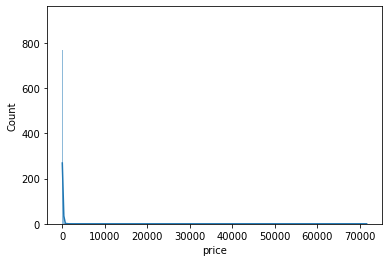

In [77]:
sns.histplot(lista['price'], kde=True)

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

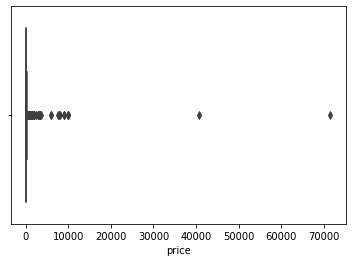

In [78]:
sns.boxplot(lista['price'])

En las anteriores gráficas se puede observar que los precios por día tienen una distribución asimétrica positiva con varios valores atípicos. 

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

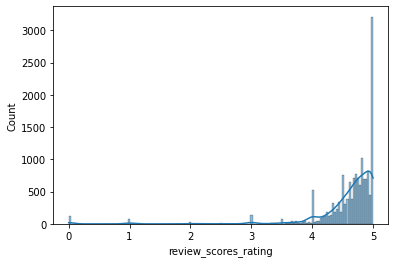

In [79]:
sns.histplot(lista['review_scores_rating'], kde=True)

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='review_scores_rating'>

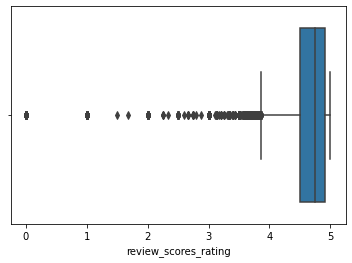

In [80]:
sns.boxplot(lista['review_scores_rating'])

En las anteriores gráficas se puede observar que los review_scores_rating (Calificación de usuarios al inmueble) tienen una distribución asimétrica negativa con algunas calificaciones en cero. 

Ahora miremos la distribución de precios de los alojamientos a través de un mapa de calor

In [81]:
heat_data = lista.groupby(["latitude","longitude"])['price'].mean().reset_index().values.tolist() 
mapa = folium.Map(location=[40.4167, -3.70325], zoom_start=13) 
folium.plugins.HeatMap(heat_data,blur=50 ).add_to(mapa)
mapa

Como el mapa se ve muy saturado se agrupó por zonas

In [82]:
m = folium.Map(location=[40.4167, -3.70325], zoom_start=13)
locations = list(zip(lista.latitude, lista.longitude))
cluster = plugins.MarkerCluster(locations=locations)  
m.add_child(cluster)
m


Ahora se define un rango de precio usando como referencia el boxplot

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

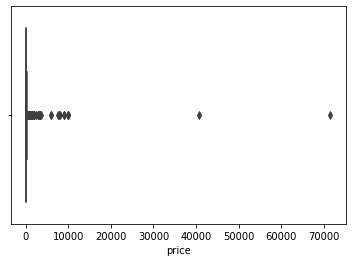

In [83]:
sns.boxplot(lista['price'])

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

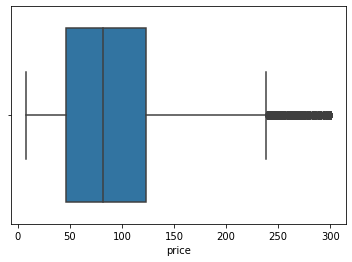

In [84]:
lista= lista[lista['price'] <= 300]
lista= lista[lista['price'] >= 5]
sns.boxplot(lista['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

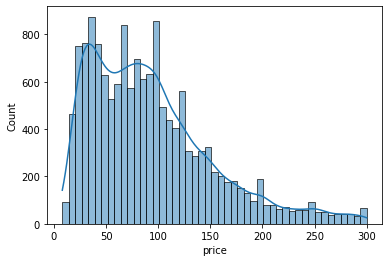

In [85]:
sns.histplot(lista['price'], kde=True)

In [86]:
lista.shape

(15059, 21)

# Variables de interés

In [87]:
Lista_R=lista.drop(['id', 'name', 'description', 'neighborhood_overview', 'host_id','host_name', 'host_location', 'host_about', 'neighbourhood'], axis=1)

In [88]:
Lista_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15059 entries, 0 to 15659
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   source                15059 non-null  object 
 1   latitude              15059 non-null  float64
 2   longitude             15059 non-null  float64
 3   property_type         15059 non-null  object 
 4   room_type             15059 non-null  object 
 5   accommodates          15059 non-null  int64  
 6   bedrooms              15059 non-null  float64
 7   beds                  15059 non-null  float64
 8   price                 15059 non-null  float64
 9   minimum_nights        15059 non-null  int64  
 10  maximum_nights        15059 non-null  int64  
 11  review_scores_rating  15059 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1.5+ MB


In [89]:
corr = Lista_R.corr()
corr.style.background_gradient(cmap='coolwarm')

In [90]:
# se guarda el dataset
Lista_R.to_csv('Lista_R.csv', index=False)
lista.to_csv('lista.csv', index=False)